## 1. Bug Algorithms (Bug2)
This task demonstrates the Bug2 algorithm, where the robot moves towards the goal but navigates around obstacles when encountered.

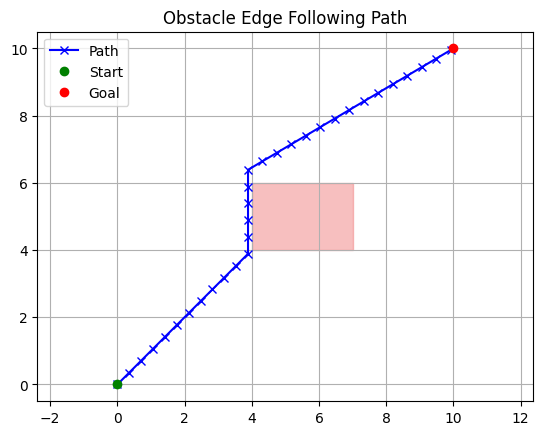

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define obstacle as a rectangle
obstacle_bottom_left = np.array([4, 4])
obstacle_width = 3
obstacle_height = 2
start = np.array([0, 0])
goal = np.array([10, 10])
path = [start]

# Setup figure
pos = start.copy()
max_steps = 200
step_size = 0.5

# Obstacle boundaries
x_min, x_max = obstacle_bottom_left[0], obstacle_bottom_left[0] + obstacle_width
y_min, y_max = obstacle_bottom_left[1], obstacle_bottom_left[1] + obstacle_height

# Movement loop
avoiding = False
for _ in range(max_steps):
    to_goal = goal - pos
    distance_to_goal = np.linalg.norm(to_goal)

    if distance_to_goal <= 0.5:
        break

    # Check if near obstacle
    if (x_min - 0.3 < pos[0] < x_max + 0.3) and (y_min - 0.3 < pos[1] < y_max + 0.3):
        avoiding = True
        # Move around obstacle along the top edge
        if pos[1] <= y_max + 0.3:
            pos = pos + np.array([0.0, step_size])  # Move up
        else:
            pos = pos + np.array([step_size, 0.0])  # Move right
        path.append(pos.copy())
    else:
        # Move toward goal
        avoiding = False
        direction = to_goal / distance_to_goal
        pos = pos + step_size * direction
        path.append(pos.copy())

# Convert to array for plotting
path = np.array(path)

# Plot
fig, ax = plt.subplots()
rect = plt.Rectangle(obstacle_bottom_left, obstacle_width, obstacle_height, color='lightcoral', alpha=0.5)
ax.add_patch(rect)
plt.plot(path[:, 0], path[:, 1], marker='x', color='blue', label='Path')
plt.plot([start[0]], [start[1]], 'go', label='Start')
plt.plot([goal[0]], [goal[1]], 'ro', label='Goal')
plt.title('Obstacle Edge Following Path')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()
